# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [95]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [97]:
pip install plotly

In [98]:
import plotly.express as px

In [99]:
#On importe les données dans un dataframe
historique_im= pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")
historique_im.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [100]:
portefeuille_actifs= pd.read_excel("portefeuille_actifs+(3) (1).xlsx")
portefeuille_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [101]:
#On vérifie que le type des données attribué par pandas est cohérent

In [102]:
#historique_immobilier_paris_2017_2021_vdef2

In [103]:
#Afficher les dimensions du dataset
print(historique_im.shape)

(26196, 9)


In [104]:
#Consulter le nombre de colonnes
print(len(historique_im.columns))


9


In [105]:
#La nature des données dans chacune des colonnes
print(historique_im.dtypes)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


In [106]:
#portefeuille_actifs+(3)(1)

In [107]:
print(portefeuille_actifs.shape)

(275, 12)


In [108]:
print(len(portefeuille_actifs.columns))

12


In [109]:
print(portefeuille_actifs.dtypes)

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [110]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :'+ (historique_im.type_local.unique()))

['la liste des différents types de biens immobiliers que nous avons dans les données est :Appartement'
 'la liste des différents types de biens immobiliers que nous avons dans les données est :Local industriel. commercial ou assimilé']


In [111]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :'+str(historique_im.groupby('type_local')['code_type_local'].unique()))

la liste des différents types de biens immobiliers que nous avons dans les données est :type_local
Appartement                                 [2]
Local industriel. commercial ou assimilé    [4]
Name: code_type_local, dtype: object


On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

### 3. Nombre de transactions

In [112]:
#On verifie le nombre de transactions que nous avons dans notre dataframe

In [113]:
print('le nombre de transactions dans les données est '+ str(len(historique_im.index)))

le nombre de transactions dans les données est 26196


In [114]:
print('le nombre de transactions pour les appartements dans les données est '  +  str (historique_im[historique_im['type_local']=='Appartement'].shape[0]))


le nombre de transactions pour les appartements dans les données est 24353


In [115]:
print('le nombre de transactions pour les locaux commerciaux dans les données est '  +  str (historique_im[historique_im['type_local']=='Local industriel. commercial ou assimilé'].shape[0]))

le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [116]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ?')
print('la dernière date de transaction dans les données est le ?')

la première date de transaction dans les données est le ?
la dernière date de transaction dans les données est le ?


In [117]:
print('la première date de transaction dans les données est le '+ str(historique_im.date_mutation.min()))

la première date de transaction dans les données est le 2017-01-02 00:00:00


In [118]:
print('la dernière date de transaction dans les données est le ' + str(historique_im.date_mutation.max()))

la dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [119]:
# Calcul de la colonne
historique_im['prix_au_metre_carre']=historique_im['valeur_fonciere']/historique_im['surface_reelle']
print (historique_im['prix_au_metre_carre'])

0        11011.193562
1         9671.732877
2         9966.020548
3        11367.582877
4        11751.113836
             ...     
26191    12735.781918
26192    13215.536370
26193    12016.765753
26194    12017.182877
26195    11544.667808
Name: prix_au_metre_carre, Length: 26196, dtype: float64


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [120]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
historique_im_appartement=historique_im.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[historique_im['type_local']=='Appartement']
historique_im_appartement.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_au_metre_carre
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836


In [121]:
historique_im_appartement["annee"] = historique_im_appartement.date_mutation.dt.year
historique_im_appartement["annee"]

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
26189    2021
26191    2021
26193    2021
26194    2021
26195    2021
Name: annee, Length: 24353, dtype: int64

In [122]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_appartement = historique_im_appartement[['prix_au_metre_carre','surface_reelle','annee']].groupby('annee',as_index=False).mean()
print(df_appartement)

   annee  prix_au_metre_carre  surface_reelle
0   2017          9492.859195       44.627737
1   2018         10031.403432       44.271671
2   2019         10562.712581       43.361645
3   2020         10674.872650       42.900654
4   2021         10455.600126       43.479864


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

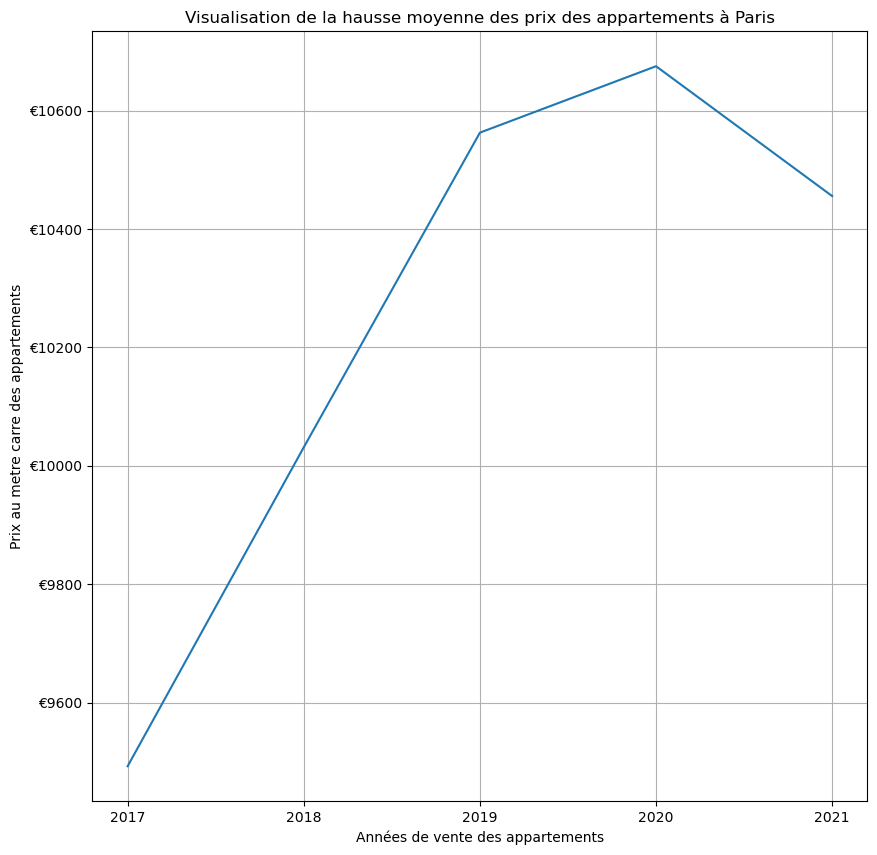

In [123]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
Annee= [str(x) for x in df_appartement.annee]
plt.plot(Annee,df_appartement["prix_au_metre_carre"])
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [124]:
#Liste des codes postaux dans nos données.
historique_im_appartement.code_postal.unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [125]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_prix = historique_im_appartement[['date_mutation','prix_au_metre_carre','code_postal','annee']].groupby(['code_postal','annee'],as_index=False).mean()
print(df_prix)

    code_postal  annee  prix_au_metre_carre
0         75001   2017         11762.706289
1         75001   2018         12621.226146
2         75001   2019         13269.256149
3         75001   2020         13405.991820
4         75001   2021         13379.498578
..          ...    ...                  ...
95        75020   2017          7886.023336
96        75020   2018          8485.162808
97        75020   2019          9093.992492
98        75020   2020          9329.305302
99        75020   2021          9114.398249

[100 rows x 3 columns]


C:\Users\laghz\AppData\Local\Temp\ipykernel_14140\3284464740.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prix = historique_im_appartement[['date_mutation','prix_au_metre_carre','code_postal','annee']].groupby(['code_postal','annee'],as_index=False).mean()


In [126]:
pre_arrondi=df_prix[df_prix.code_postal==75001]
pre_arrondi

,code_postal,annee,prix_au_metre_carre
0,75001,2017,11762.706289
1,75001,2018,12621.226146
2,75001,2019,13269.256149
3,75001,2020,13405.991820
4,75001,2021,13379.498578


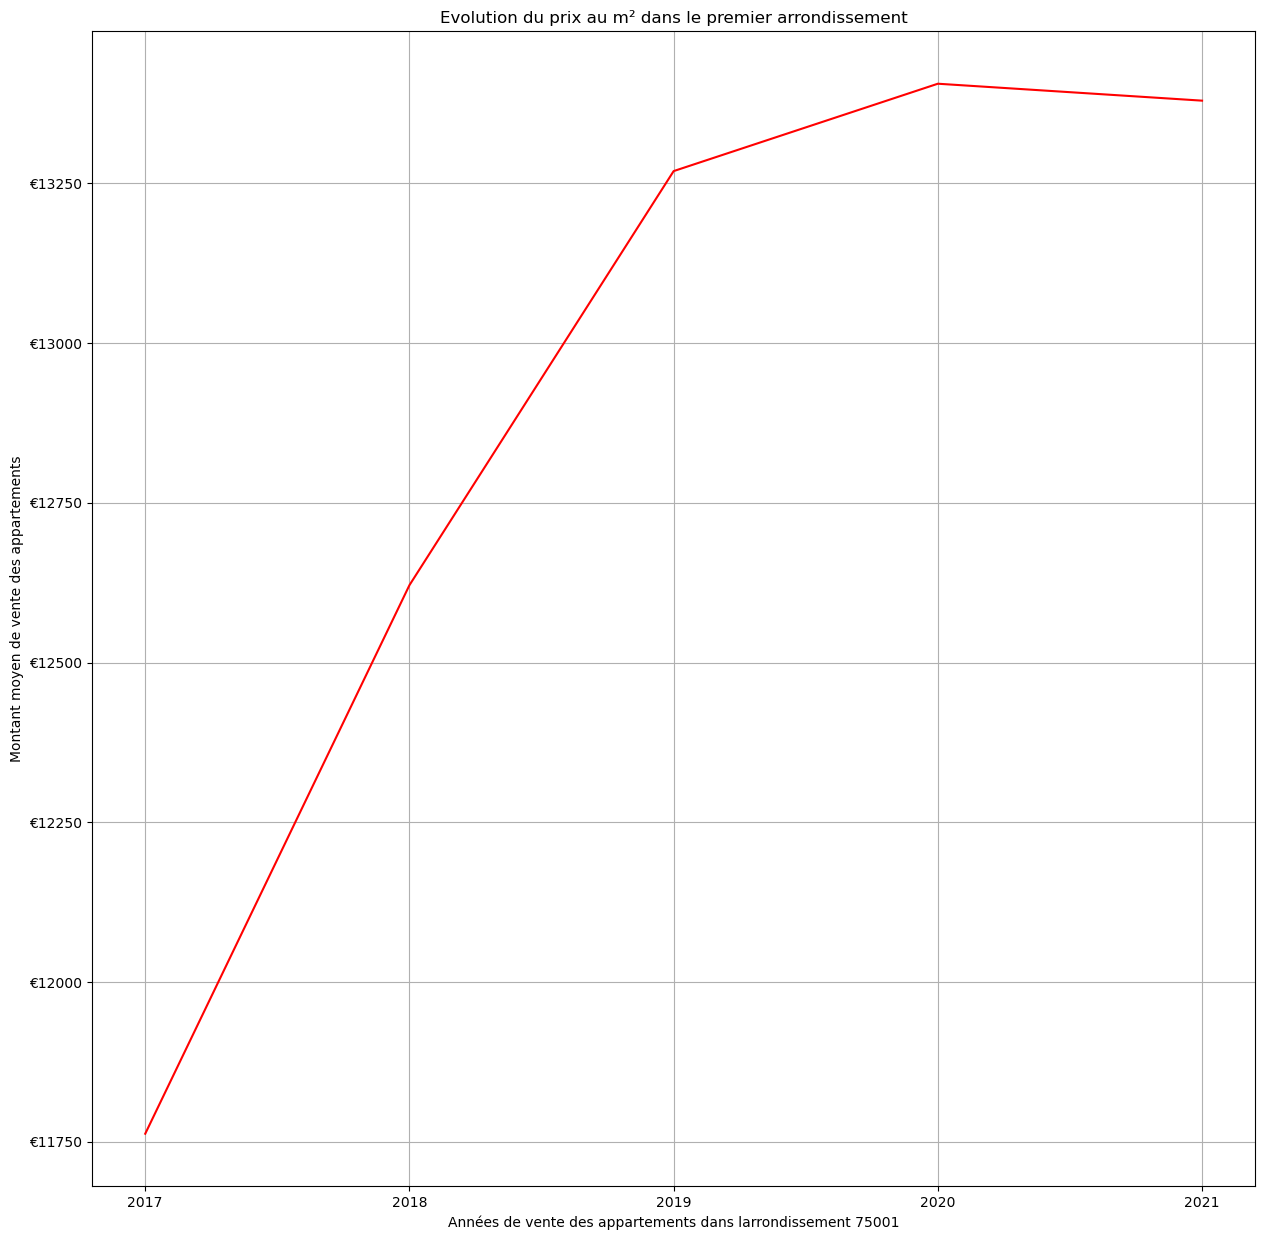

In [127]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
pre_arrondi=df_prix[df_prix.code_postal==75001]
Annee = [str(x) for x in pre_arrondi.annee]
plt.plot(Annee,pre_arrondi["prix_au_metre_carre"],color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

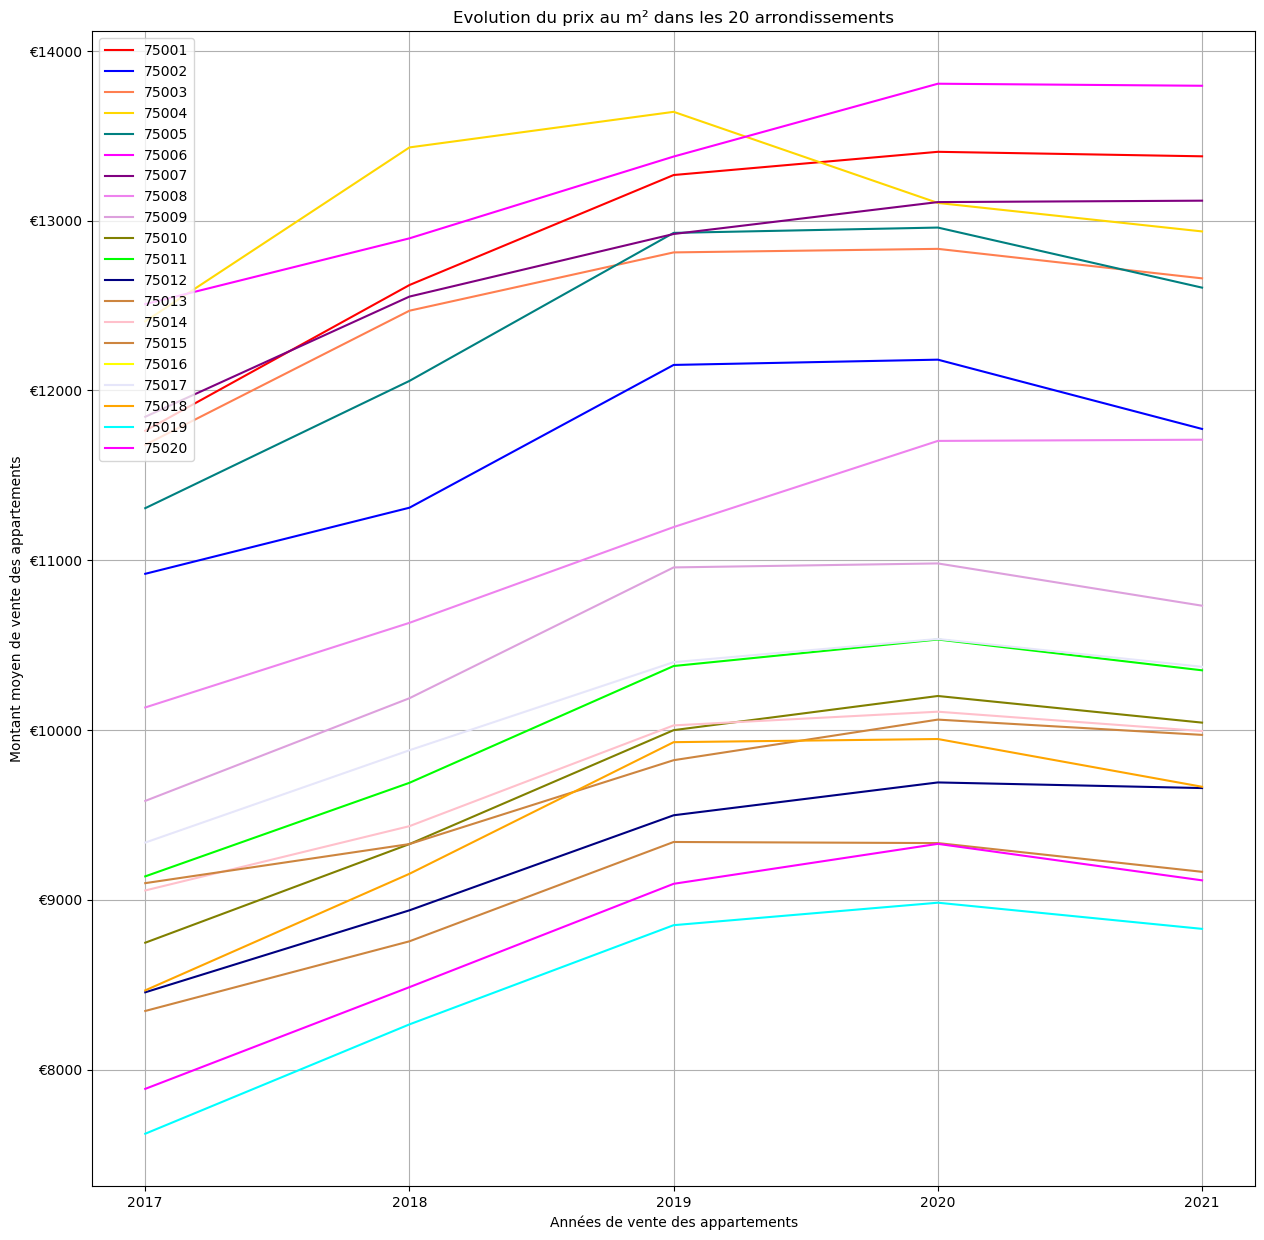

In [128]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
pre_arrondi_1=df_prix[df_prix.code_postal==75001]
Annee_1 = [str(x) for x in pre_arrondi_1.annee]
plt.plot(Annee_1,pre_arrondi_1["prix_au_metre_carre"],label='75001',color='red')
pre_arrondi_2=df_prix[df_prix.code_postal==75002]
Annee_2 = [str(x) for x in pre_arrondi_2.annee]
plt.plot(Annee_2,pre_arrondi_2["prix_au_metre_carre"],label='75002',color='blue')
pre_arrondi_3=df_prix[df_prix.code_postal==75003]
Annee_3= [str(x) for x in pre_arrondi_3.annee]
plt.plot(Annee_3,pre_arrondi_3["prix_au_metre_carre"],label='75003',color='coral')
pre_arrondi_4=df_prix[df_prix.code_postal==75004]
Annee_4= [str(x) for x in pre_arrondi_4.annee]
plt.plot(Annee_4,pre_arrondi_4["prix_au_metre_carre"],label='75004',color='gold')
pre_arrondi_5=df_prix[df_prix.code_postal==75005]
Annee_5= [str(x) for x in pre_arrondi_5.annee]
plt.plot(Annee_5,pre_arrondi_5["prix_au_metre_carre"],label='75005',color='teal')
pre_arrondi_6=df_prix[df_prix.code_postal==75006]
Annee_6= [str(x) for x in pre_arrondi_6.annee]
plt.plot(Annee_6,pre_arrondi_6["prix_au_metre_carre"],label='75006',color='magenta')
pre_arrondi_7=df_prix[df_prix.code_postal==75007]
Annee_7= [str(x) for x in pre_arrondi_7.annee]
plt.plot(Annee_7,pre_arrondi_7["prix_au_metre_carre"],label='75007',color='purple')
pre_arrondi_8=df_prix[df_prix.code_postal==75008]
Annee_8 = [str(x) for x in pre_arrondi_8.annee]
plt.plot(Annee_8,pre_arrondi_8["prix_au_metre_carre"],label='75008',color='violet')
pre_arrondi_9=df_prix[df_prix.code_postal==75009]
Annee_9= [str(x) for x in pre_arrondi_9.annee]
plt.plot(Annee_9,pre_arrondi_9["prix_au_metre_carre"],label='75009',color='plum')
pre_arrondi_10=df_prix[df_prix.code_postal==75010]
Annee_10= [str(x) for x in pre_arrondi_10.annee]
plt.plot(Annee_10,pre_arrondi_10["prix_au_metre_carre"],label='75010',color='olive')
pre_arrondi_11=df_prix[df_prix.code_postal==75011]
Annee_11= [str(x) for x in pre_arrondi_11.annee]
plt.plot(Annee_11,pre_arrondi_11["prix_au_metre_carre"],label='75011',color='lime')
pre_arrondi_12=df_prix[df_prix.code_postal==75012]
Annee_12= [str(x) for x in pre_arrondi_12.annee]
plt.plot(Annee_12,pre_arrondi_12["prix_au_metre_carre"],label='75012',color='navy')
pre_arrondi_13=df_prix[df_prix.code_postal==75013]
Annee_13= [str(x) for x in pre_arrondi_13.annee]
plt.plot(Annee_13,pre_arrondi_13["prix_au_metre_carre"],label='75013',color='peru')
pre_arrondi_14=df_prix[df_prix.code_postal==75014]
Annee_14= [str(x) for x in pre_arrondi_14.annee]
plt.plot(Annee_14,pre_arrondi_14["prix_au_metre_carre"],label='75014',color='pink')
pre_arrondi_15=df_prix[df_prix.code_postal==75015]
Annee_15= [str(x) for x in pre_arrondi_15.annee]
plt.plot(Annee_15,pre_arrondi_15["prix_au_metre_carre"],label='75015',color='peru')
pre_arrondi_16=df_prix[df_prix.code_postal==7501]
Annee_16= [str(x) for x in pre_arrondi_16.annee]
plt.plot(Annee_16,pre_arrondi_16["prix_au_metre_carre"],label='75016',color='yellow')
pre_arrondi_17=df_prix[df_prix.code_postal==75017]
Annee_17= [str(x) for x in pre_arrondi_17.annee]
plt.plot(Annee_17,pre_arrondi_17["prix_au_metre_carre"],label='75017',color='lavender')
pre_arrondi_18=df_prix[df_prix.code_postal==75018]
Annee_18= [str(x) for x in pre_arrondi_18.annee]
plt.plot(Annee_18,pre_arrondi_18["prix_au_metre_carre"],label='75018',color='orange')
pre_arrondi_19=df_prix[df_prix.code_postal==75019]
Annee_19= [str(x) for x in pre_arrondi_19.annee]
plt.plot(Annee_19,pre_arrondi_19["prix_au_metre_carre"],label='75019',color='cyan')
pre_arrondi_20=df_prix[df_prix.code_postal==75020]
Annee_20= [str(x) for x in pre_arrondi_20.annee]
plt.plot(Annee_20,pre_arrondi_20["prix_au_metre_carre"],label='75020',color='fuchsia')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend()
plt.show()

On observe que globalement que ?

### 7. Prix au metre carré par transaction dans un arrondissement

In [129]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
historique_im_appartement[historique_im_appartement['code_postal']==75006].shape[0]

709

In [130]:
six_arrondi=historique_im_appartement[historique_im_appartement.code_postal==75006]
print(six_arrondi)

      date_mutation  valeur_fonciere  code_postal   type_local  \
478      2017-01-10     9.601314e+05        75006  Appartement   
482      2017-01-13     8.204362e+05        75006  Appartement   
484      2017-01-13     1.796112e+06        75006  Appartement   
488      2017-01-17     2.488198e+05        75006  Appartement   
491      2017-01-19     4.828724e+05        75006  Appartement   
...             ...              ...          ...          ...   
24915    2021-12-22     1.360988e+06        75006  Appartement   
24953    2021-12-16     9.705679e+05        75006  Appartement   
24956    2021-12-27     2.525194e+05        75006  Appartement   
25013    2021-12-24     6.051571e+05        75006  Appartement   
25020    2021-12-29     3.850466e+05        75006  Appartement   

       surface_reelle  prix_au_metre_carre  annee  
478                78         12309.376712   2017  
482                68         12065.237671   2017  
484               143         12560.221781   2017  

On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

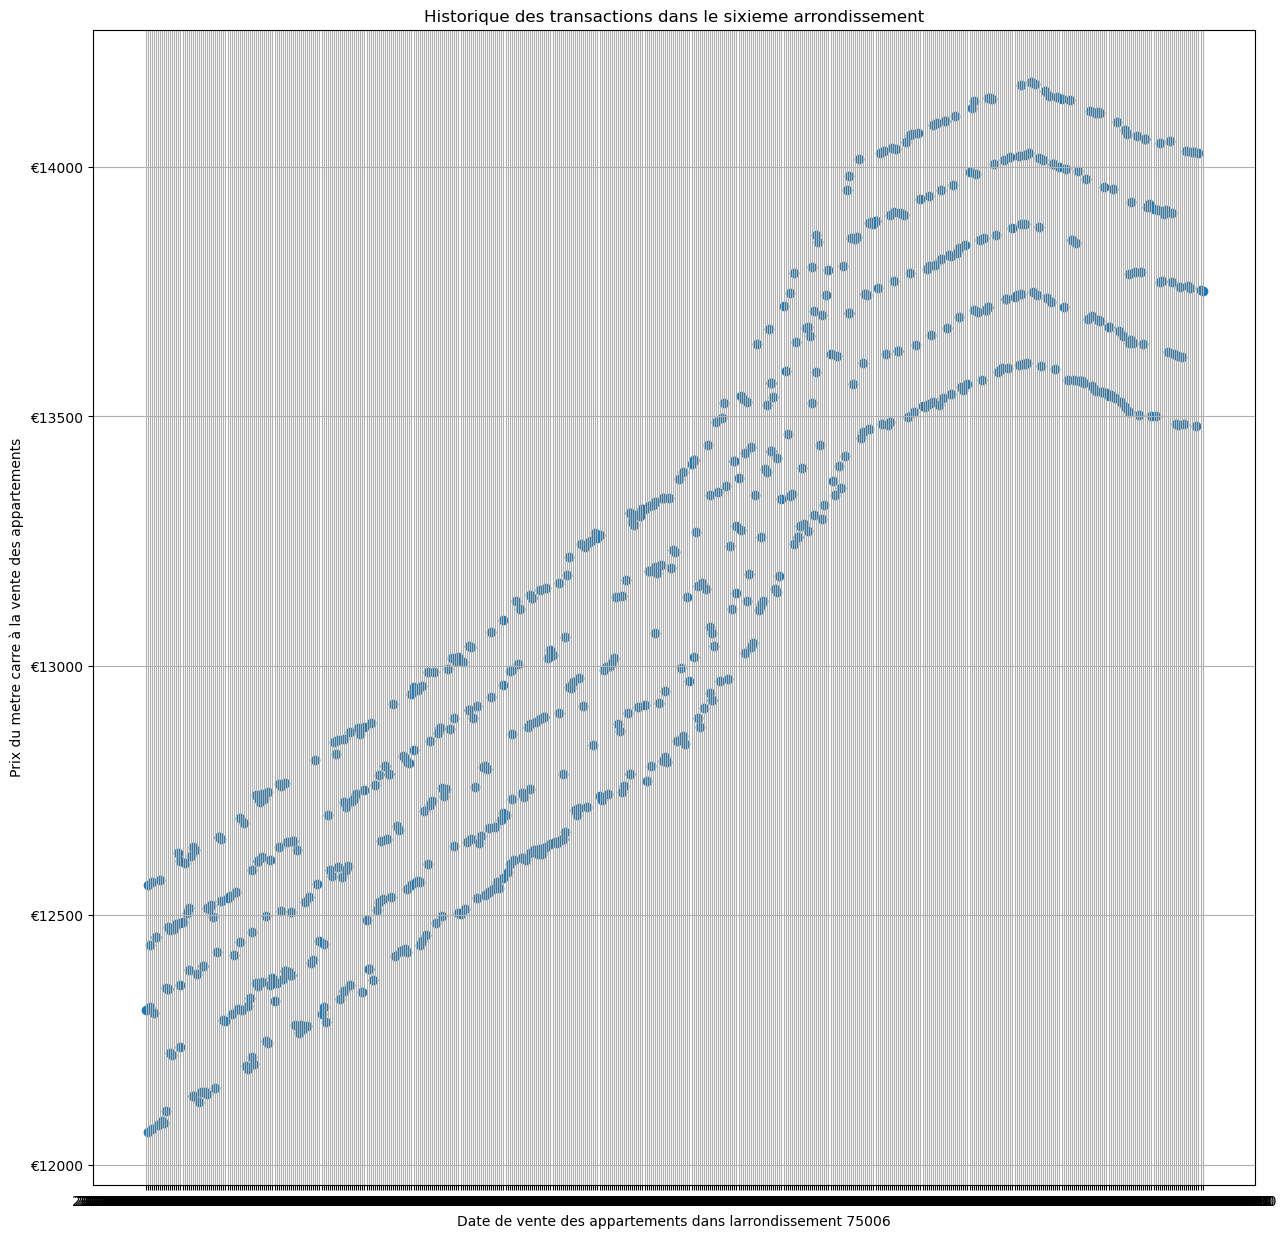

In [131]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
annee = [str(x) for x in six_arrondi.date_mutation]
plt.scatter(annee,six_arrondi["prix_au_metre_carre"])
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [132]:
#On calcule la corrélation de Spearman
from scipy.stats import pearsonr


In [133]:
date_reference = pd.to_datetime('2017-01-01')

In [134]:
six_arrondi['date_mutation_s'] = (six_arrondi['date_mutation'] - date_reference).dt.total_seconds()

C:\Users\laghz\AppData\Local\Temp\ipykernel_14140\1817493008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six_arrondi['date_mutation_s'] = (six_arrondi['date_mutation'] - date_reference).dt.total_seconds()


In [135]:
corrélation=pearsonr(six_arrondi['prix_au_metre_carre'],six_arrondi['date_mutation_s'])
print(corrélation)

PearsonRResult(statistic=0.9038446031491479, pvalue=7.108378962577139e-263)


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [136]:
corr=pearsonr(six_arrondi['surface_reelle'],six_arrondi['valeur_fonciere'])
print(corr)

PearsonRResult(statistic=0.9977572898250296, pvalue=0.0)


Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [137]:
#On crée un dataset qui ne contient que les locaux commerciaux
historique_im_locaux=historique_im.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local'])[historique_im['type_local']=='Local industriel. commercial ou assimilé']
historique_im_locaux.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,type_local,surface_reelle,prix_au_metre_carre
18,2017-02-01,3.113277e+06,75003,Paris 3e Arrondissement,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,Paris 3e Arrondissement,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,Paris 3e Arrondissement,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,Paris 1er Arrondissement,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,Paris 3e Arrondissement,Local industriel. commercial ou assimilé,25,12636.289027


In [138]:
historique_im_locaux["annee"] = historique_im_locaux.date_mutation.dt.year
historique_im_locaux["annee"]

18       2017
29       2017
34       2017
91       2017
109      2017
         ... 
26149    2021
26164    2021
26166    2021
26190    2021
26192    2021
Name: annee, Length: 1843, dtype: int64

In [139]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
prix_moyen_locaux_année = historique_im_locaux[['prix_au_metre_carre','annee']].groupby('annee',as_index=False).mean()
print(prix_moyen_locaux_année)

   annee  prix_au_metre_carre
0   2017         10949.909217
1   2018         11569.499180
2   2019         11960.132050
3   2020         11966.470204
4   2021         12006.488691


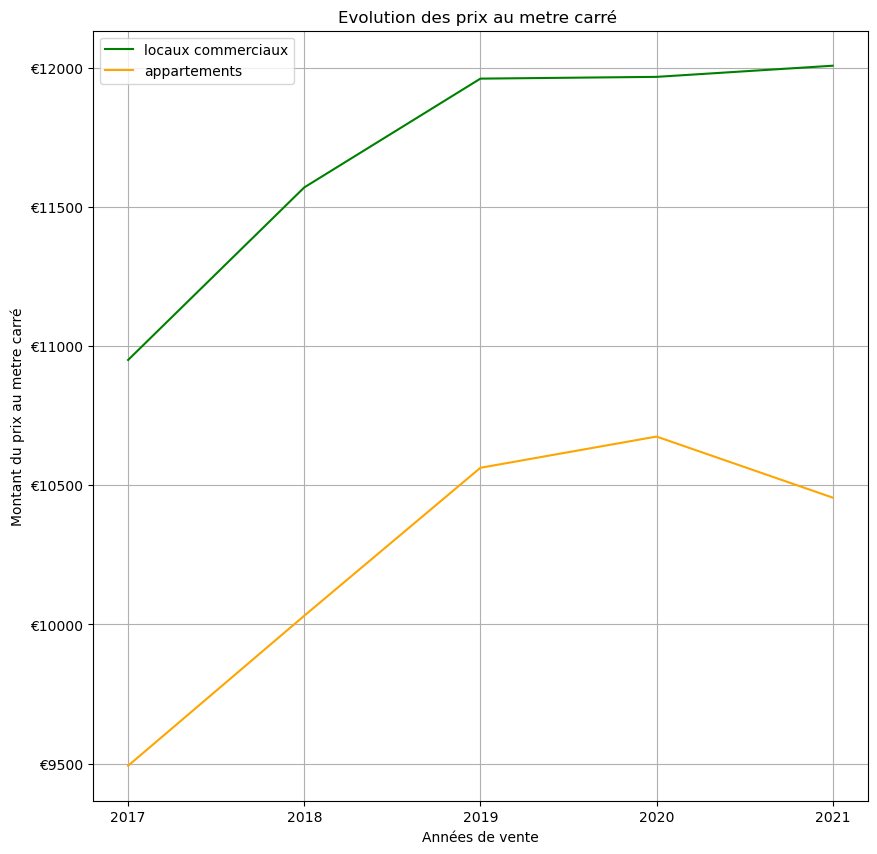

In [140]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
Annee = [str(x) for x in df_appartement.annee]
AnnEe = [str(x) for x in prix_moyen_locaux_année.annee]
plt.plot(AnnEe,prix_moyen_locaux_année["prix_au_metre_carre"],label='locaux commerciaux',color='green')
plt.plot(Annee,df_appartement["prix_au_metre_carre"],label='appartements',color='orange')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [141]:
from sklearn.datasets import fetch_openml


In [142]:
historique_im

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_metre_carre
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.781918
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.536370
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.765753
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.182877


In [143]:
code_01=pd.get_dummies(historique_im['code_postal'])
print(code_01)

       75001  75002  75003  75004  75005  75006  75007  75008  75009  75010  \
0          0      0      1      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      1      0      0   
2          0      0      0      0      0      0      0      1      0      0   
3          0      0      1      0      0      0      0      0      0      0   
4          1      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
26191      0      0      0      1      0      0      0      0      0      0   
26192      0      1      0      0      0      0      0      0      0      0   
26193      0      1      0      0      0      0      0      0      0      0   
26194      0      1      0      0      0      0      0      0      0      0   
26195      0      1      0      0      0      0      0      0      0      0   

       75011  75012  75013  75014  75015  75016  75

In [144]:
data_historique=historique_im.join(code_01)
print(data_historique)

      date_mutation  valeur_fonciere  adresse_numero  \
0        2017-01-03     5.505597e+05               8   
1        2017-01-12     1.576492e+06              32   
2        2017-01-10     6.577574e+05              52   
3        2017-01-10     2.500868e+05              64   
4        2017-01-13     1.762667e+05              25   
...             ...              ...             ...   
26191    2021-02-25     4.712239e+05              16   
26192    2021-02-17     1.982330e+06              23   
26193    2021-03-08     3.124359e+05               5   
26194    2021-03-11     1.562234e+05              15   
26195    2021-03-19     3.694294e+05             190   

                     adresse_nom_voie  code_postal               nom_commune  \
0      RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                          AV MARCEAU        75008   Paris 8e Arrondissement   
2        RUE DU FAUBOURG SAINT HONORE        75008   Paris 8e Arrondissement   
3      

In [145]:
data_historique = data_historique.join(pd.get_dummies(data_historique['type_local']))
print(data_historique)

      date_mutation  valeur_fonciere  adresse_numero  \
0        2017-01-03     5.505597e+05               8   
1        2017-01-12     1.576492e+06              32   
2        2017-01-10     6.577574e+05              52   
3        2017-01-10     2.500868e+05              64   
4        2017-01-13     1.762667e+05              25   
...             ...              ...             ...   
26191    2021-02-25     4.712239e+05              16   
26192    2021-02-17     1.982330e+06              23   
26193    2021-03-08     3.124359e+05               5   
26194    2021-03-11     1.562234e+05              15   
26195    2021-03-19     3.694294e+05             190   

                     adresse_nom_voie  code_postal               nom_commune  \
0      RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                          AV MARCEAU        75008   Paris 8e Arrondissement   
2        RUE DU FAUBOURG SAINT HONORE        75008   Paris 8e Arrondissement   
3      

In [146]:
date_reference = pd.to_datetime('2017-01-02')

In [147]:
data_historique['date_mutation_s'] = (data_historique['date_mutation'] - date_reference).dt.total_seconds()

In [148]:
data_historique.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_au_metre_carre'],axis='columns',inplace=True)


In [149]:
data_historique

,valeur_fonciere,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,date_mutation_s
0,5.505597e+05,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,86400.0
1,1.576492e+06,163,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,864000.0
2,6.577574e+05,66,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,691200.0
3,2.500868e+05,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,691200.0
4,1.762667e+05,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,950400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,4.712239e+05,37,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,130896000.0
26192,1.982330e+06,150,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,130204800.0
26193,3.124359e+05,26,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,131846400.0
26194,1.562234e+05,13,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,132105600.0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [150]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(data_historique[['surface_reelle',75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,'Appartement','Local industriel. commercial ou assimilé','date_mutation_s']],data_historique['valeur_fonciere'],test_size=0.33,random_state=6)


In [151]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [152]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
model_line=LinearRegression().fit(X_train,y_train)
y_pred=model_line.predict(X_test)
(np.mean(abs(y_test-y_pred)/y_test))*100

8.930168288171359

Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- ?
- ?
- ?
- ?

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [153]:
#On importe les données dans un dataframe
portefeuille_actifs= pd.read_excel("portefeuille_actifs+(3) (1).xlsx")
portefeuille_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [154]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
data_immobiliers= portefeuille_actifs.join(pd.get_dummies(portefeuille_actifs['code_postal']))
print(data_immobiliers)

     adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0               127             RUE SAINT-DENIS        75001         75101   
1                62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2                62              RUE DE TURENNE        75003         75103   
3                32                 AV GEORGE V        75008         75108   
4               152                BD HAUSSMANN        75008         75108   
..              ...                         ...          ...           ...   
270              15              AV DE LAUMIERE        75019         75119   
271               3            RUE SAINT-JOSEPH        75002         75102   
272               2                  RUE GRETRY        75002         75102   
273             115               RUE D ABOUKIR        75002         75102   
274              16                 RUE AUBRIOT        75004         75104   

                  nom_commune  surface_carrez  code_type_local 

In [155]:
data_immobiliers= data_immobiliers.join(pd.get_dummies(data_immobiliers['type_local']))
print(data_immobiliers)

     adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0               127             RUE SAINT-DENIS        75001         75101   
1                62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2                62              RUE DE TURENNE        75003         75103   
3                32                 AV GEORGE V        75008         75108   
4               152                BD HAUSSMANN        75008         75108   
..              ...                         ...          ...           ...   
270              15              AV DE LAUMIERE        75019         75119   
271               3            RUE SAINT-JOSEPH        75002         75102   
272               2                  RUE GRETRY        75002         75102   
273             115               RUE D ABOUKIR        75002         75102   
274              16                 RUE AUBRIOT        75004         75104   

                  nom_commune  surface_carrez  code_type_local 

In [156]:
data_immobiliers.drop(['code_commune','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','surface_carrez','nombre_pieces_principales','longitude','latitude'],axis='columns',inplace=True)


In [157]:
data_immobiliers

,surface_reelle_bati,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
271,15,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
272,35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
273,49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

In [159]:
data_immobiliers['date'] = pd.to_datetime('2022-12-31')
print(data_immobiliers['date'])

0     2022-12-31
1     2022-12-31
2     2022-12-31
3     2022-12-31
4     2022-12-31
         ...    
270   2022-12-31
271   2022-12-31
272   2022-12-31
273   2022-12-31
274   2022-12-31
Name: date, Length: 275, dtype: datetime64[ns]


In [160]:
data_immobiliers['date_mutation_s'] = (data_immobiliers['date'] - date_reference).dt.total_seconds()

In [161]:
data_immobiliers_nouveau=data_immobiliers[['surface_reelle_bati',75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,'Appartement','Local industriel. commercial ou assimilé','date_mutation_s']]

In [162]:
data_immobiliers_nouveau.rename(columns={'surface_reelle_bati':'surface_reelle'},inplace=True)

C:\Users\laghz\AppData\Local\Temp\ipykernel_14140\2768993079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_immobiliers_nouveau.rename(columns={'surface_reelle_bati':'surface_reelle'},inplace=True)


In [163]:
#Conversion du dataframe en str
data_immobiliers_nouveau.columns = data_immobiliers_nouveau.columns.astype(str)


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [164]:
#On effectue la prédiction
y_pred_nouveau=model_line.predict(data_immobiliers_nouveau)


In [165]:
#On vérifie les 10 premières valeurs
y_pred_nouveau[:10]

array([433567.93072458, 372408.97900172, 820218.5742067 , 884292.83709188,
       342755.65219283, 478139.94841759, 393237.33226707, 640196.15521838,
       149121.45771349, 147768.51322213])

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [166]:
data_immobiliers_nouveau['valeur_fonciere_predict']=y_pred_nouveau

In [167]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')
data_immobiliers_nouveau.loc[data_immobiliers_nouveau['Appartement']==1]['valeur_fonciere_predict'].sum()/1000000

la valorisation du segment particulier est (en millions deuros):


71.23716023200699

In [168]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')
data_immobiliers_nouveau.loc[data_immobiliers_nouveau['Local industriel. commercial ou assimilé']==1]['valeur_fonciere_predict'].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


98.31912849022572

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- ?
- ?

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [184]:
#On importe les données dans un dataframe
echantillon= pd.read_excel("echantillon_a_classer2.xlsx")
echantillon.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [185]:
echantillon['prix_au_metre_carre']=echantillon['valeur_fonciere']/echantillon['surface_reelle']


In [186]:
X=echantillon.drop(columns=['valeur_fonciere','surface_reelle','nom_commune'])
X.head()

,code_postal,prix_au_metre_carre
0,75019,9871.444128
1,75019,10045.572493
2,75019,9194.697790
3,75019,9469.142168
4,75019,7463.610005


Text(0, 0.5, 'prix_au_metre_carre')

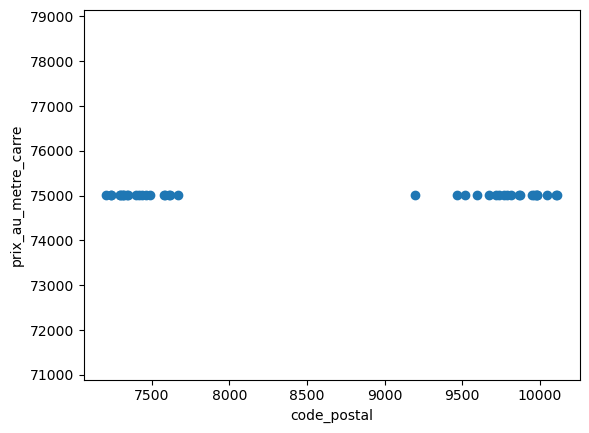

In [187]:
plt.scatter(X['prix_au_metre_carre'],X['code_postal'])
plt.xlabel('code_postal')
plt.ylabel('prix_au_metre_carre')

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [188]:
from sklearn.cluster import KMeans

In [189]:
inert= []
for i in range(1,11) :
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(np.array(X['prix_au_metre_carre']).reshape(-1,1))
    inert.append(Kmeans.inertia_) 

C:\Users\laghz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laghz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laghz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laghz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

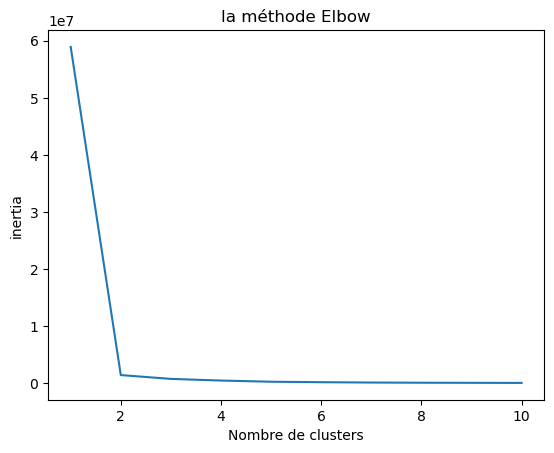

In [190]:
plt.plot(range(1,11),inert)
plt.title('la méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertia')
plt.show()

In [191]:
 #Le nombre de clusters idéal c'est 2

In [192]:
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(X)

C:\Users\laghz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laghz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [193]:
Kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [194]:
# On vérifie les données de la prédiction
X['classe_prediction']=Kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


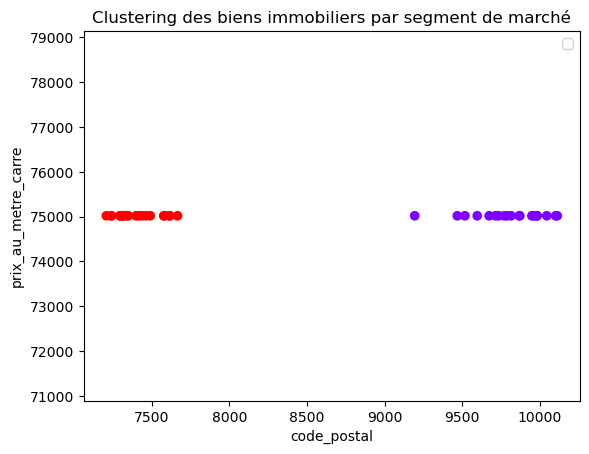

In [195]:
plt.scatter(X['prix_au_metre_carre'],X['code_postal'], c=X['classe_prediction'], cmap='rainbow')
plt.title("Clustering des biens immobiliers par segment de marché")
plt.xlabel("code_postal")
plt.ylabel("prix_au_metre_carre")
plt.legend()
plt.show()

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [196]:
#On affiche les résultats


In [197]:
X['type_local_predictions']=X['classe_prediction'].apply(lambda x:'appartement' if x==0 else 'local industriel')
print(X)

    code_postal  prix_au_metre_carre  classe_prediction type_local_predictions
0         75019          9871.444128                  0            appartement
1         75019         10045.572493                  0            appartement
2         75019          9194.697790                  0            appartement
3         75019          9469.142168                  0            appartement
4         75019          7463.610005                  1       local industriel
5         75019          9982.016919                  0            appartement
6         75019          9674.262777                  0            appartement
7         75019          7348.917415                  1       local industriel
8         75019          9789.051438                  0            appartement
9         75019          7616.420959                  1       local industriel
10        75019          7490.469041                  1       local industriel
11        75019          9518.076103                

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- ?
- ?